In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import scipy.stats as stats
plt.style.use('seaborn-v0_8')
%matplotlib inline

print("All packages imported successfully!")


All packages imported successfully!


In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df.shape
print('First 5 rows:')

df.head()


First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


###  Basic information about the dataset

In [3]:
print("=== DATASET INFO ===")
df.info()
print("===missing values===")
df.isnull().sum()
print("===basic statistics===")
df.describe()

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB   

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


##### Missing-Value Report

In [4]:
total_rows = len(df)
missing_percent = (df.isnull().sum() / total_rows * 100)
high_missing = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(high_missing)

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [5]:

# drop the comments column since it's empty
df_clean = df.drop(columns=['Comments'])
print(f'Dataset shape after removing null column: {df_clean.shape}')

Dataset shape after removing null column: (525600, 18)


##### Median imputation

In [6]:
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH','ModA', 'ModB', 'WS', 'WSgust']

for col in key_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].meadian(), inplace=True)

print("Missing values after cleaning:")
print(df_clean.isnull().sum())

Missing values after cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [7]:
df_clean.to_csv('../data/sierraleone-bumbuna_clean.csv', index = False)
print('Cleaned data and exported to bein_clean.csv')

Cleaned data and exported to bein_clean.csv


In [8]:
z_scores = pd.DataFrame()
for col in key_columns:
    z_scores[col] = np.abs(stats.zscore(df_clean[col].dropna() if df_clean[col].isnull().any() else df_clean[col]))

print("Z-scores calculated successfully!")
print("Z-score stats (min, max, mean):")
for col in key_columns:
    col_z = z_scores[col]
    print(f"{col}: {col_z.min():.2f}, {col_z.max():.2f}, {col_z.mean():.2f}")

Z-scores calculated successfully!
Z-score stats (min, max, mean):
GHI: 0.00, 4.35, 0.83
DNI: 0.00, 3.79, 0.77
DHI: 0.00, 4.90, 0.85
Tamb: 0.00, 3.19, 0.82
RH: 0.00, 3.39, 0.81
ModA: 0.00, 4.32, 0.82
ModB: 0.00, 4.41, 0.82
WS: 0.04, 14.57, 0.83
WSgust: 0.01, 13.73, 0.81


##### Flag Outliers

In [9]:
# Flag rows where ANY column has |Z| > 3
outlier_flags = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows (|Z| > 3): {outlier_flags.sum()}")
print(f"Percentage of outliers: {(outlier_flags.sum() / len(df_clean) * 100):.2f}%")

# Show the outlier rows
if outlier_flags.sum() > 0:
    print("\nOutlier rows preview:")
    df_outliers = df_clean[outlier_flags]
    display(df_outliers.head())
else:
    print("No outliers found!")

Number of outlier rows (|Z| > 3): 20968
Percentage of outliers: 3.99%

Outlier rows preview:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6


In [10]:
# Which columns are causing the most outliers?
outlier_breakdown = (z_scores > 3).sum()
print("Outliers per column:")
for col in key_columns:
    count = (z_scores[col] > 3).sum()
    percentage = (count / len(df_clean)) * 100
    print(f"{col}: {count} outliers ({percentage:.2f}%)")

# Find the most problematic columns
most_outliers = outlier_breakdown.idxmax()
print(f"\nColumn with most outliers: {most_outliers}")

Outliers per column:
GHI: 2477 outliers (0.47%)
DNI: 7586 outliers (1.44%)
DHI: 2986 outliers (0.57%)
Tamb: 192 outliers (0.04%)
RH: 4929 outliers (0.94%)
ModA: 1604 outliers (0.31%)
ModB: 2041 outliers (0.39%)
WS: 3967 outliers (0.75%)
WSgust: 3665 outliers (0.70%)

Column with most outliers: DNI


In [11]:
# Load the original sierraleone-bumbuna.csv (not the cleaned one) to see if it has timestamp
df_original = pd.read_csv('../data/sierraleone-bumbuna.csv')
print("Original dataset columns:")
print(df_original.columns.tolist())

# Look for timestamp in original data
timestamp_cols = [col for col in df_original.columns if 'time' in col.lower() or 'date' in col.lower()]
print("Timestamp columns in original:", timestamp_cols)

Original dataset columns:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Timestamp columns in original: ['Timestamp']


#### Re- clean the data with time stamp 

In [12]:
# Reload the original data and clean it properly
df_original = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Convert timestamp first
df_original['Timestamp'] = pd.to_datetime(df_original['Timestamp'])

# Now do the cleaning but KEEP the timestamp
df_clean = df_original.drop(columns=['Comments'])  # Only remove Comments column

# Handle missing values in other columns
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
for col in key_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Data cleaned with timestamp preserved!")
print("Columns in cleaned data:", df_clean.columns.tolist())

Data cleaned with timestamp preserved!
Columns in cleaned data: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']


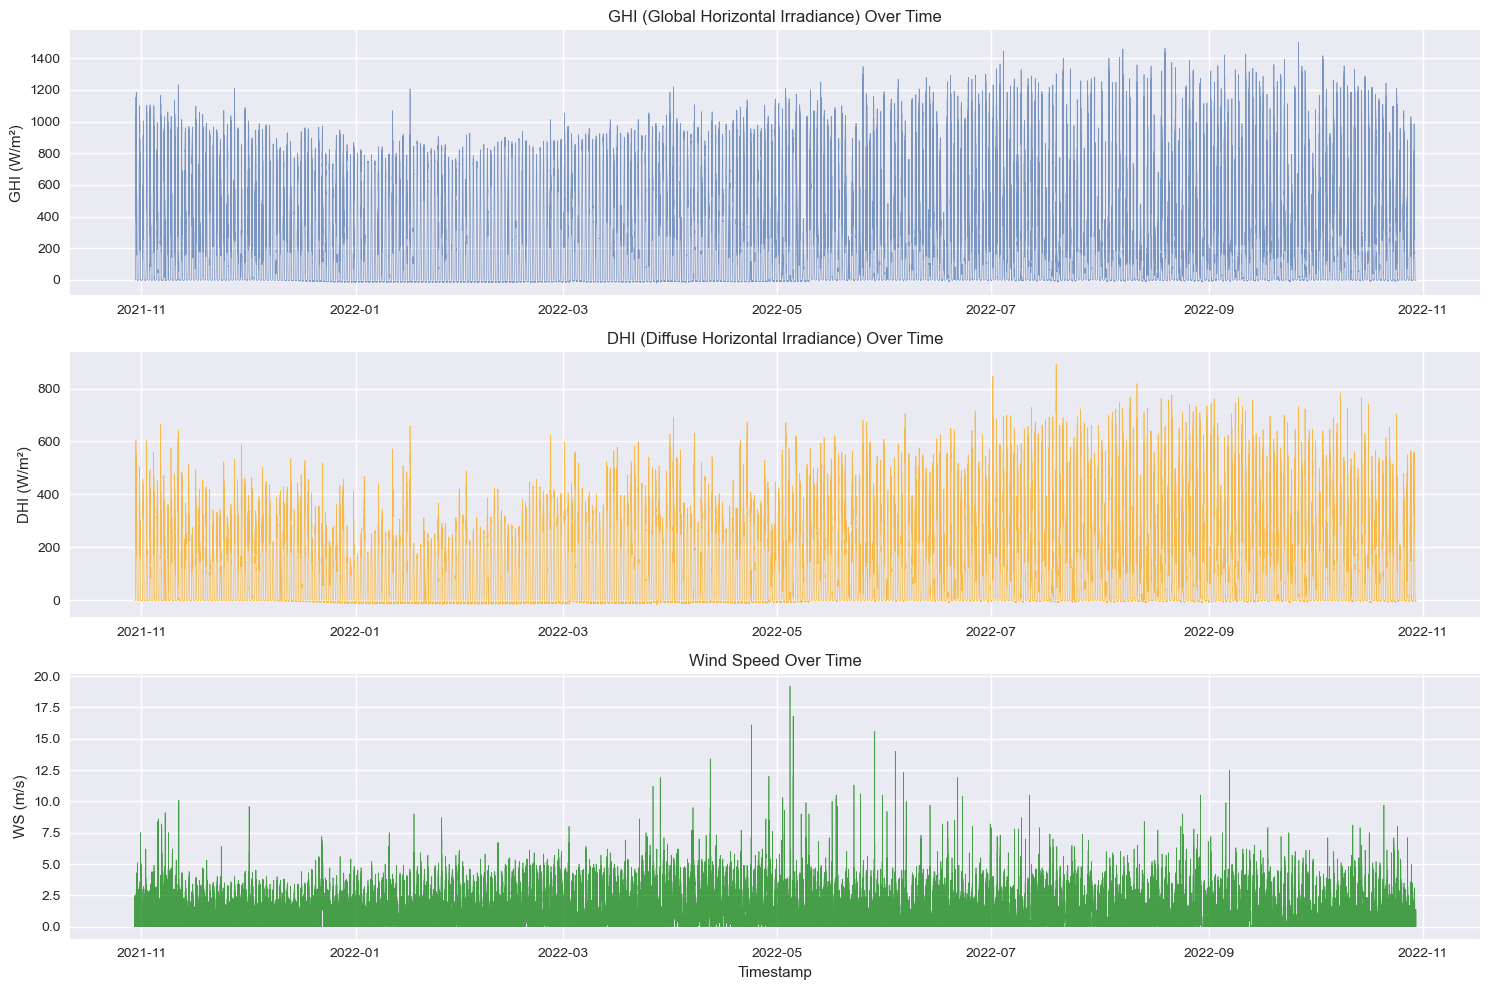

In [13]:
plt.figure(figsize=(15, 10))

# GHI over time
plt.subplot(3, 1, 1)
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.7, linewidth=0.5)
plt.title('GHI (Global Horizontal Irradiance) Over Time')
plt.ylabel('GHI (W/m²)')

# DHI over time
plt.subplot(3, 1, 2)
plt.plot(df_clean['Timestamp'], df_clean['DHI'], alpha=0.7, color='orange', linewidth=0.5)
plt.title('DHI (Diffuse Horizontal Irradiance) Over Time')
plt.ylabel('DHI (W/m²)')

# WS over time
plt.subplot(3, 1, 3)
plt.plot(df_clean['Timestamp'], df_clean['WS'], alpha=0.7, color='green', linewidth=0.5)
plt.title('Wind Speed Over Time')
plt.ylabel('WS (m/s)')
plt.xlabel('Timestamp')

plt.tight_layout()
plt.show()

In [14]:
# Save with timestamp included
df_clean.to_csv('../data/sierraleone-bumbuna_clean.csv', index=False)
print("Properly cleaned data saved with timestamp!")

Properly cleaned data saved with timestamp!


### Cleaning Impact

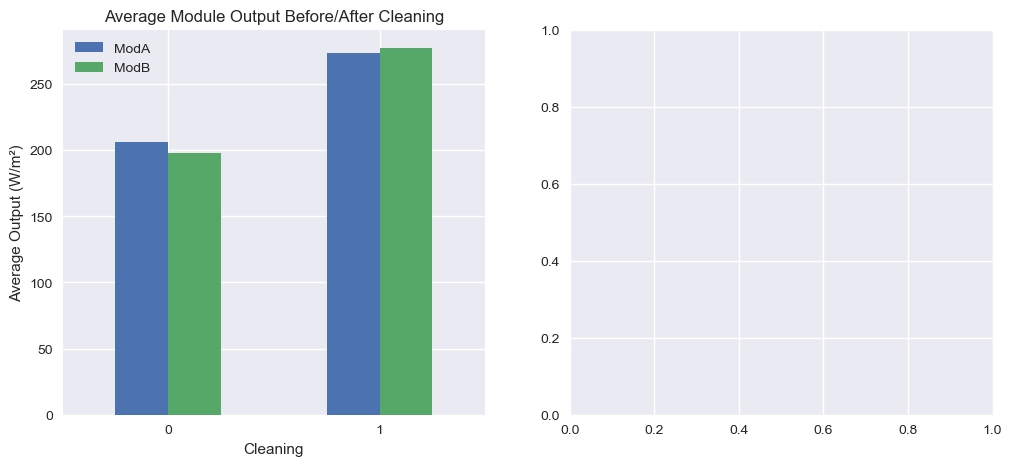

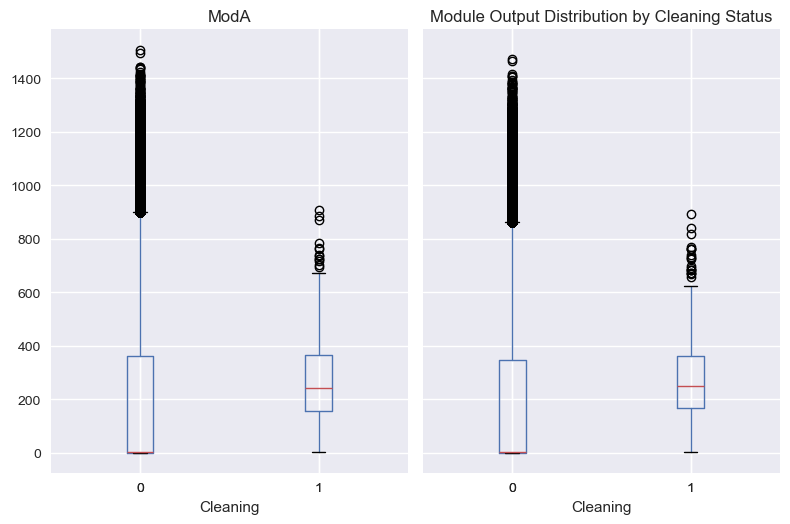

In [15]:
# Group by Cleaning flag and plot average ModA & ModB pre/post-clean
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', ax=plt.gca())
plt.title('Average Module Output Before/After Cleaning')
plt.ylabel('Average Output (W/m²)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
# Boxplot to see distribution differences
df_clean.boxplot(column=['ModA', 'ModB'], by='Cleaning')
plt.title('Module Output Distribution by Cleaning Status')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

####  Correlation & Relationship Analysis

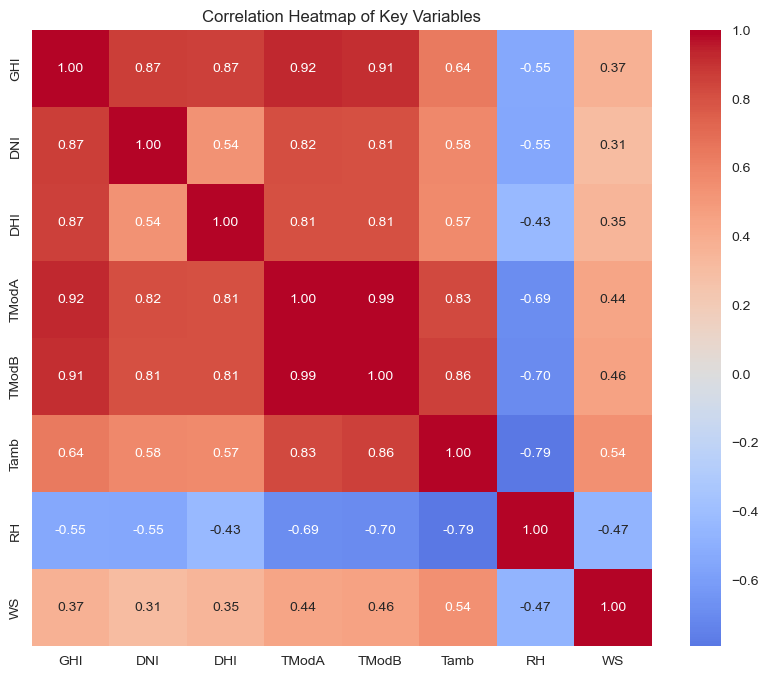

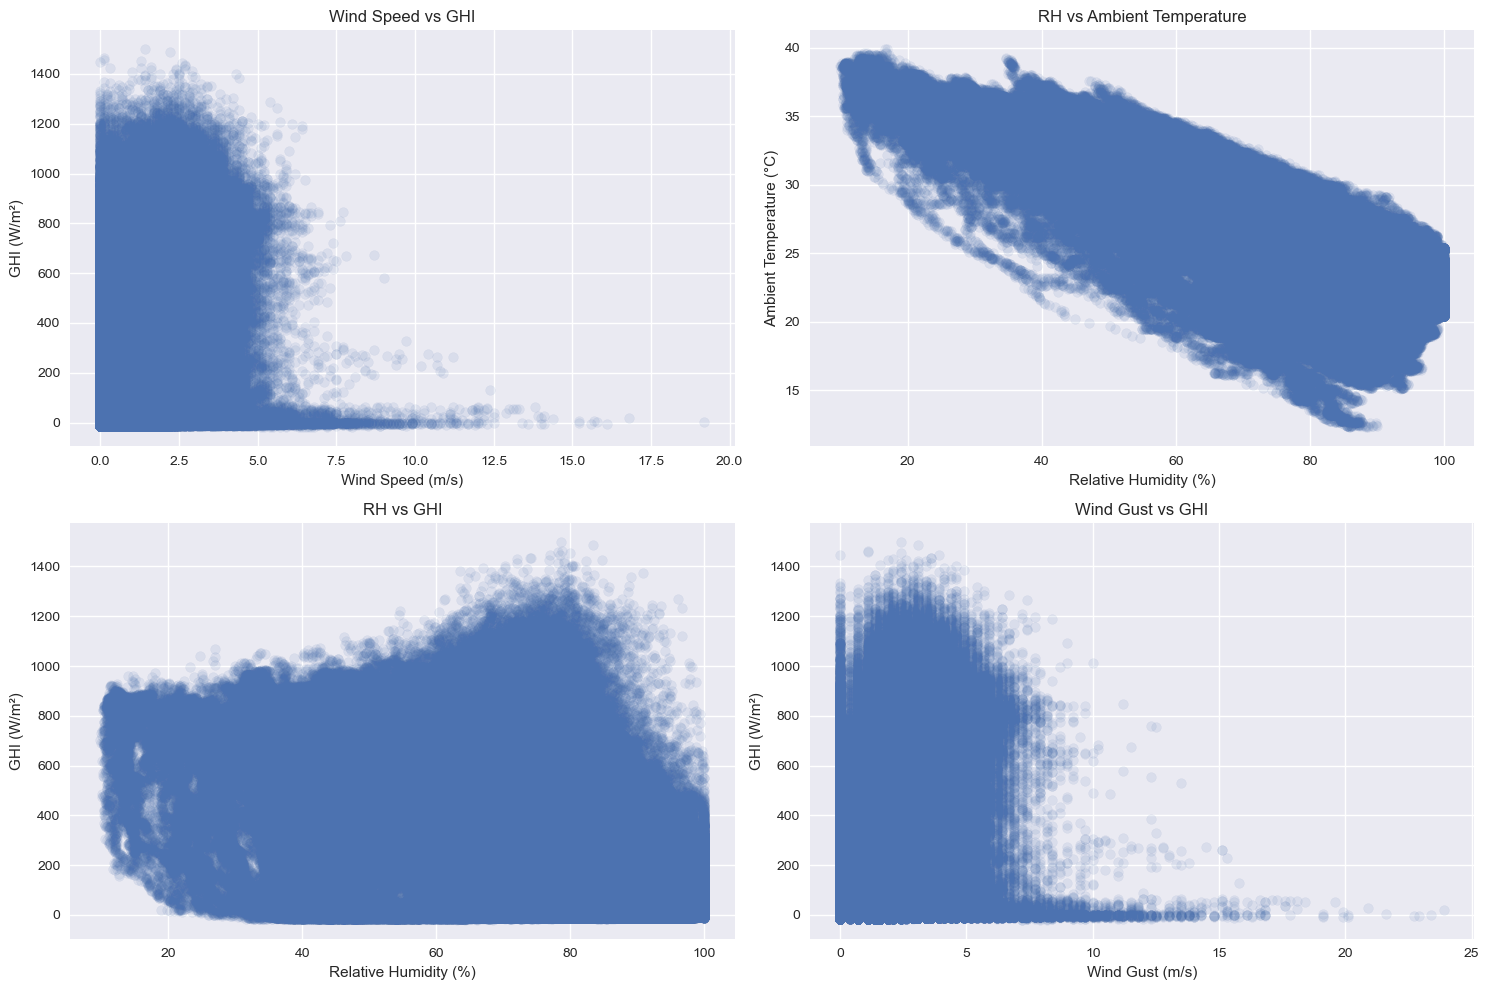

In [16]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
sns.heatmap(df_clean[corr_columns].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# WS vs GHI
axes[0,0].scatter(df_clean['WS'], df_clean['GHI'], alpha=0.1)
axes[0,0].set_xlabel('Wind Speed (m/s)')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].set_title('Wind Speed vs GHI')

# RH vs Tamb
axes[0,1].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.1)
axes[0,1].set_xlabel('Relative Humidity (%)')
axes[0,1].set_ylabel('Ambient Temperature (°C)')
axes[0,1].set_title('RH vs Ambient Temperature')

# RH vs GHI
axes[1,0].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.1)
axes[1,0].set_xlabel('Relative Humidity (%)')
axes[1,0].set_ylabel('GHI (W/m²)')
axes[1,0].set_title('RH vs GHI')

# WSgust vs GHI
axes[1,1].scatter(df_clean['WSgust'], df_clean['GHI'], alpha=0.1)
axes[1,1].set_xlabel('Wind Gust (m/s)')
axes[1,1].set_ylabel('GHI (W/m²)')
axes[1,1].set_title('Wind Gust vs GHI')

plt.tight_layout()
plt.show()

#### Temperature Analysis 

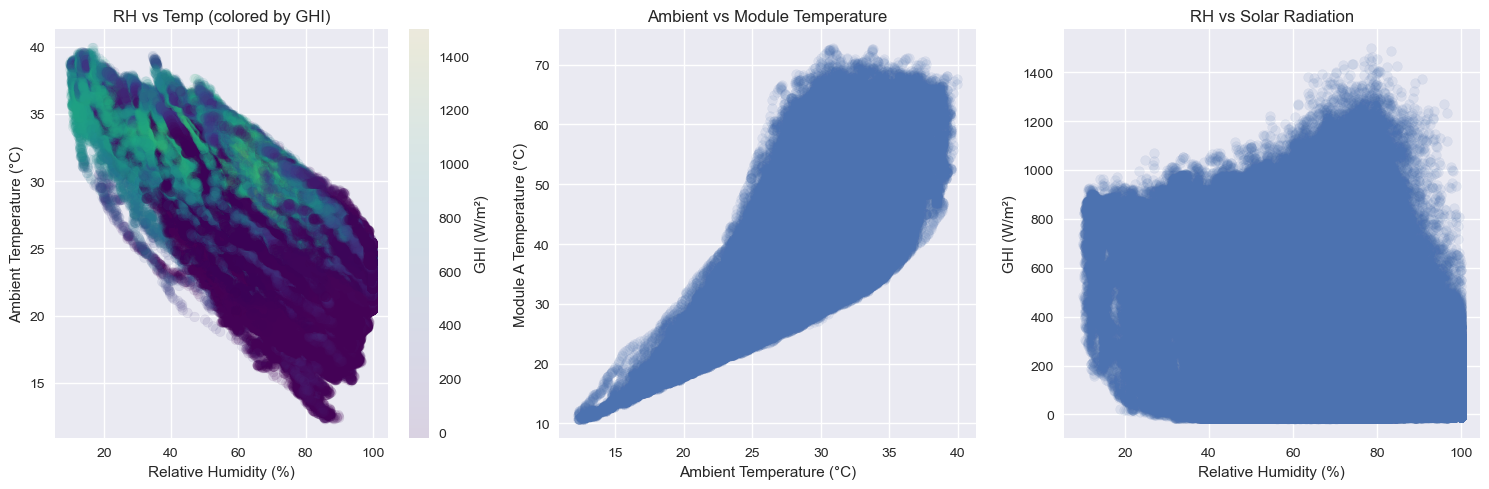

In [17]:
# Examine how RH influences temperature and solar radiation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.1, c=df_clean['GHI'], cmap='viridis')
plt.colorbar(label='GHI (W/m²)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs Temp (colored by GHI)')

plt.subplot(1, 3, 2)
plt.scatter(df_clean['Tamb'], df_clean['TModA'], alpha=0.1)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Module A Temperature (°C)')
plt.title('Ambient vs Module Temperature')

plt.subplot(1, 3, 3)
plt.scatter(df_clean['RH'], df_clean['GHI'], alpha=0.1)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs Solar Radiation')

plt.tight_layout()
plt.show()

##### Bubble Chart

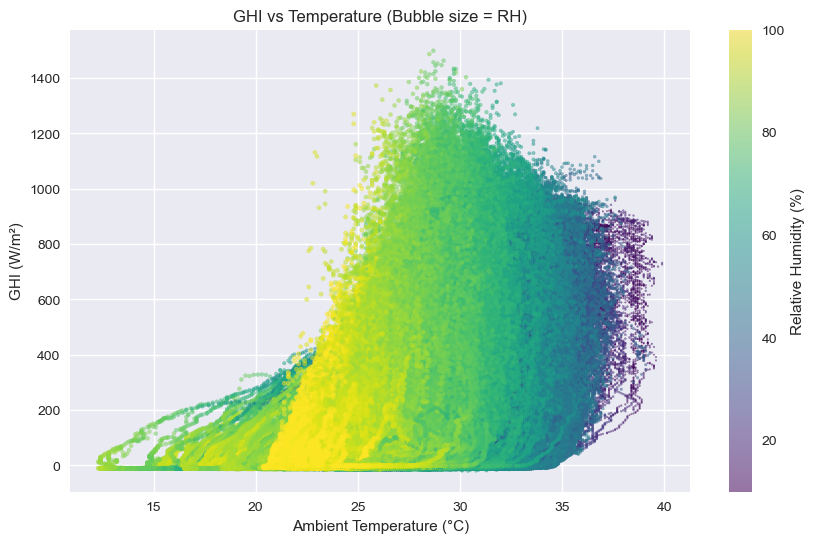

In [18]:
# GHI vs Tamb with bubble size = RH
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['Tamb'], df_clean['GHI'], 
                     c=df_clean['RH'], 
                     s=df_clean['RH']/10,  # Bubble size based on RH
                     alpha=0.5, 
                     cmap='viridis')
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.show()